In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv(r"C:\Users\USER\Downloads\wine (1).csv")

In [7]:
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [8]:
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [9]:
df.describe

<bound method NDFrame.describe of      Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoid

In [10]:
df.value_counts()

Type  Alcohol  Malic  Ash   Alcalinity  Magnesium  Phenols  Flavanoids  Nonflavanoids  Proanthocyanins  Color  Hue   Dilution  Proline
1     12.85    1.60   2.52  17.8        95         2.48     2.37        0.26           1.46             3.93   1.09  3.63      1015       1
      12.93    3.80   2.65  18.6        102        2.41     2.41        0.25           1.98             4.50   1.03  3.52      770        1
      13.05    1.65   2.55  18.0        98         2.45     2.43        0.29           1.44             4.25   1.12  2.51      1105       1
               1.73   2.04  12.4        92         2.72     3.27        0.17           2.91             7.20   1.12  2.91      1150       1
               1.77   2.10  17.0        107        3.00     3.00        0.28           2.03             5.04   0.88  3.35      885        1
                                                                                                                                         ..
3     13.84    4.12   2.3

In [11]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [12]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

<Axes: >

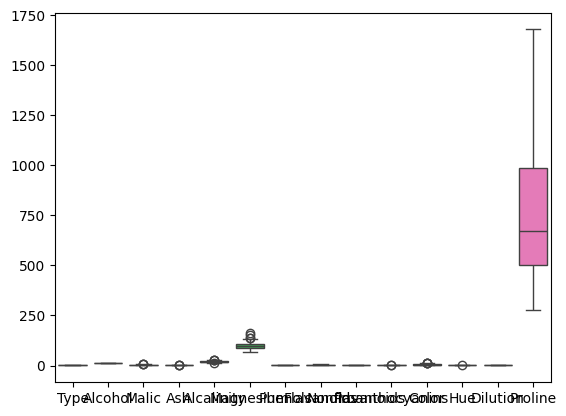

In [14]:
sns.boxplot(df)

In [15]:
def outlier_caping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_extream=q1-1.5*iqr
    upper_extream=q3+1.5*iqr
    df[column]=df[column].apply(lambda x:lower_extream if x<lower_extream else upper_extream if x>upper_extream else x)
for col in df.select_dtypes(["int","float"]).columns:
    outlier_caping(df,col)

<Axes: >

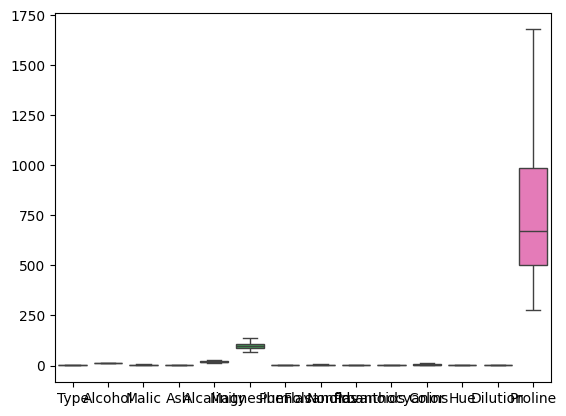

In [17]:
sns.boxplot(df)

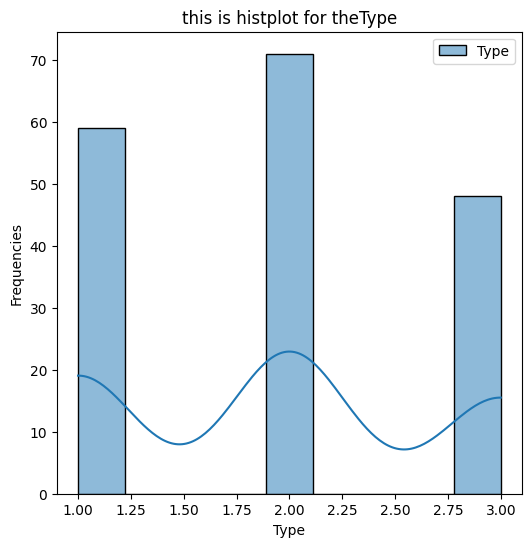

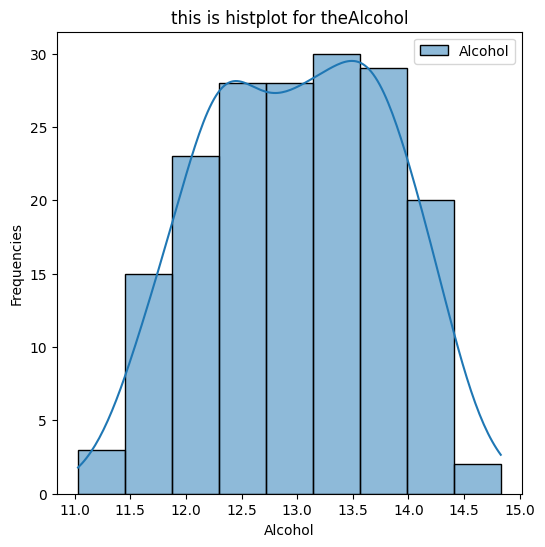

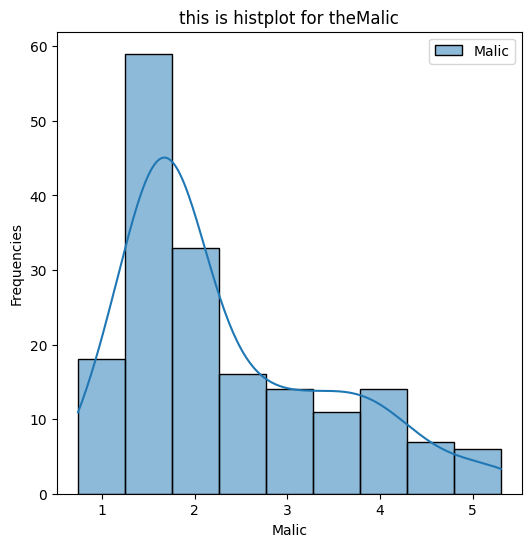

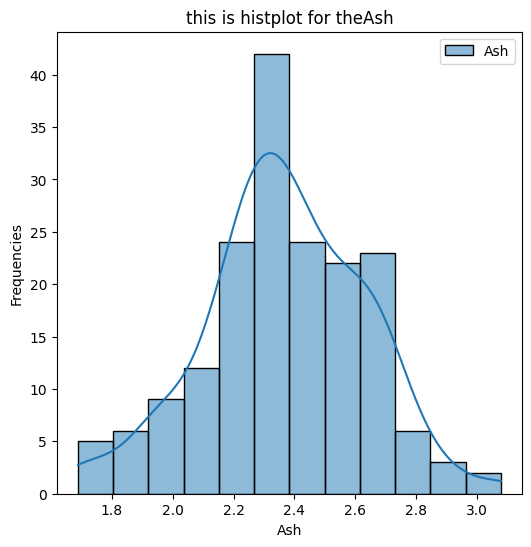

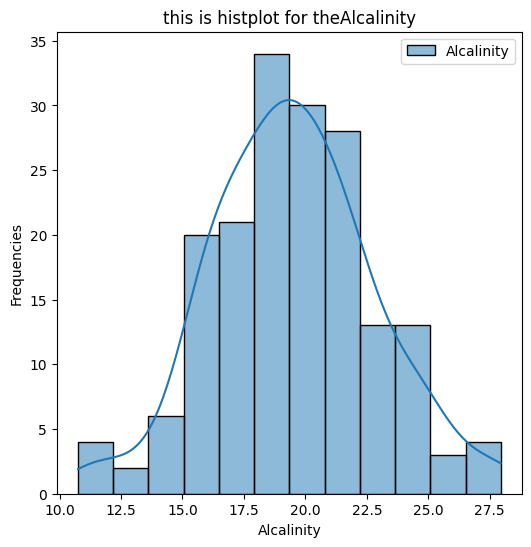

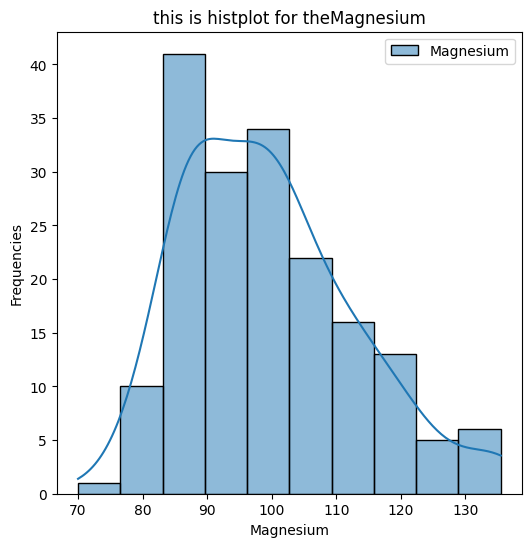

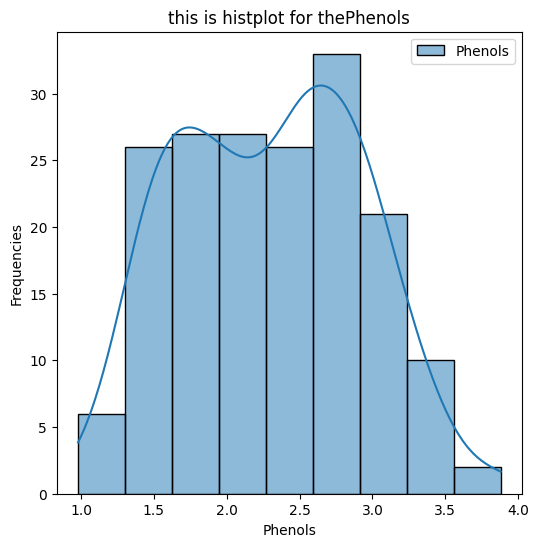

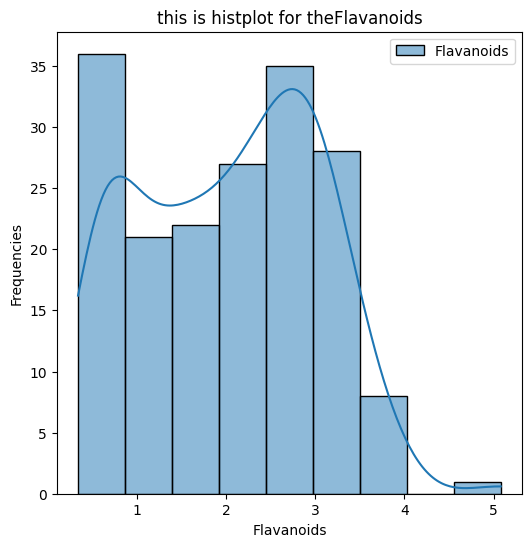

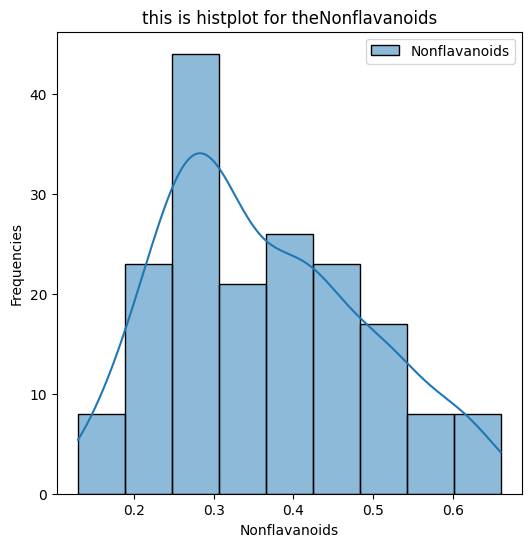

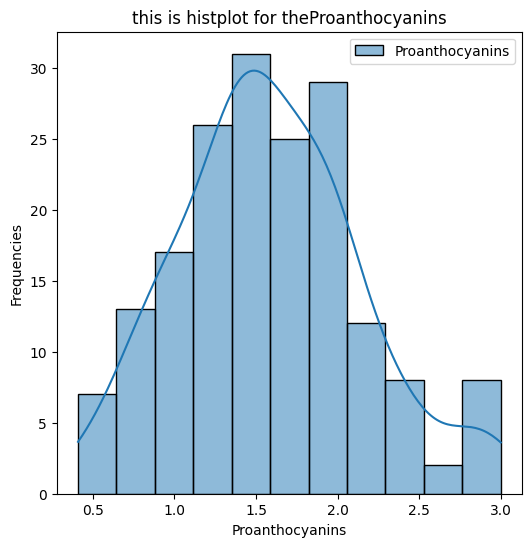

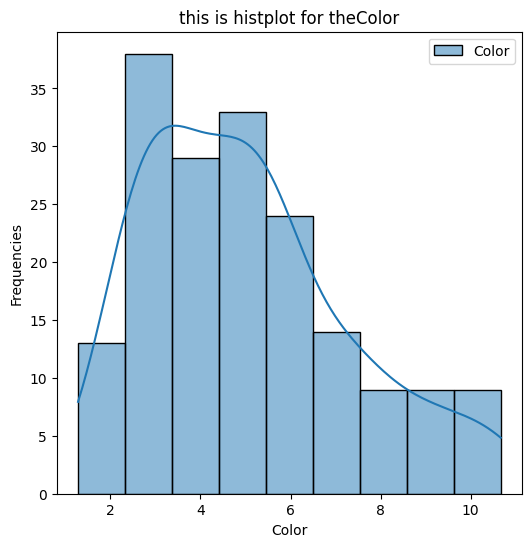

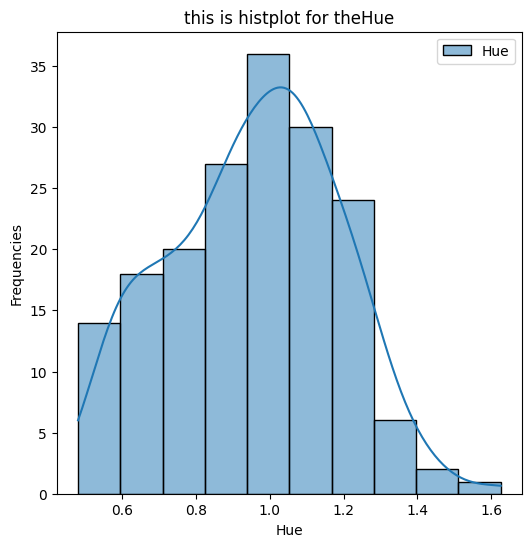

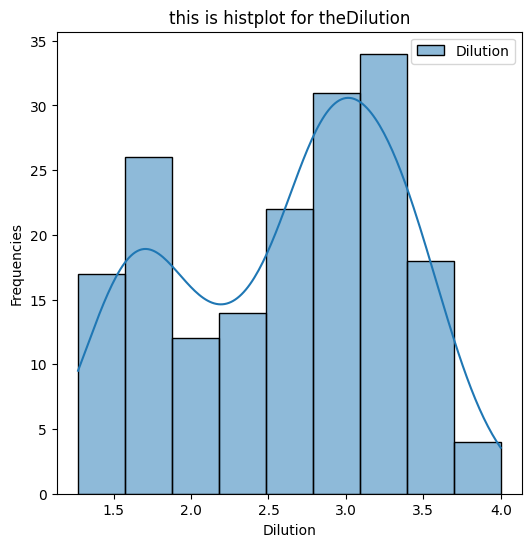

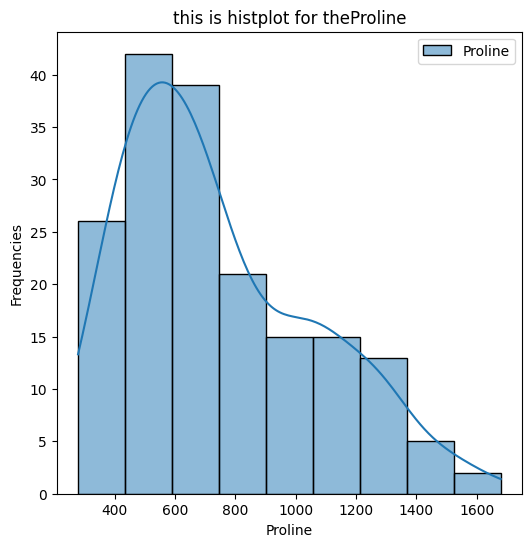

In [19]:
for col in df.columns:
    plt.figure(figsize=(6,6))
    sns.histplot(df[col],kde=True,label=col)
    plt.xlabel(col)
    plt.ylabel("Frequencies")
    plt.title(f"this is histplot for the{col}")
    plt.legend()
    plt.show()

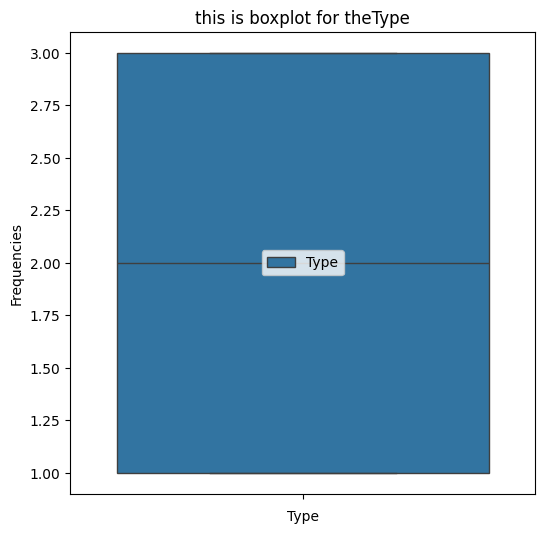

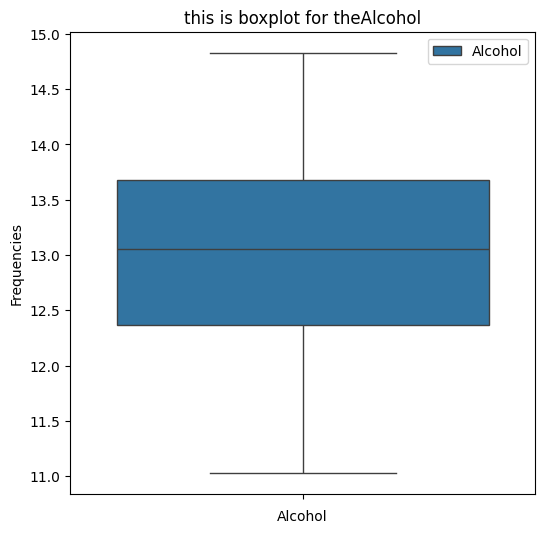

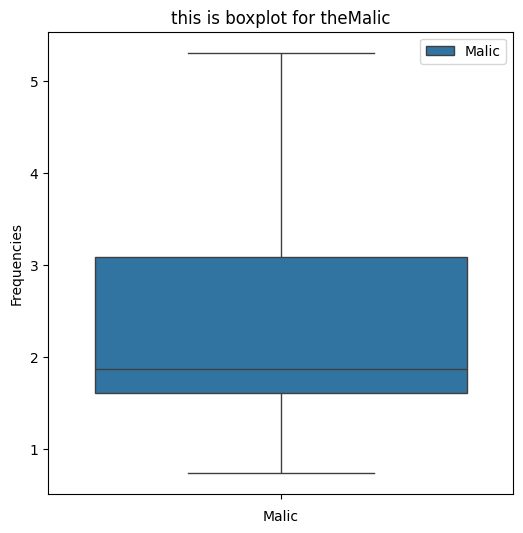

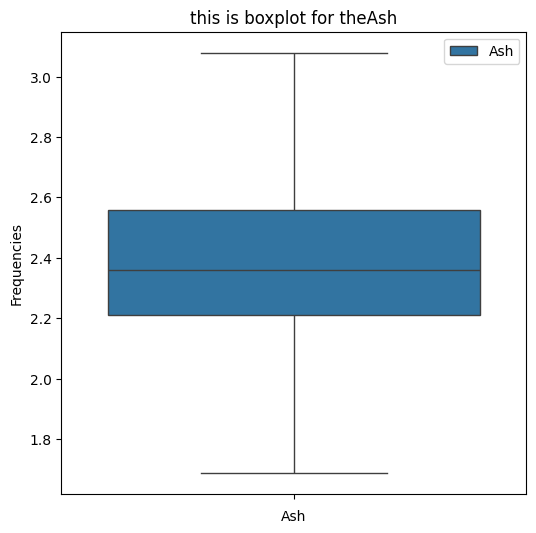

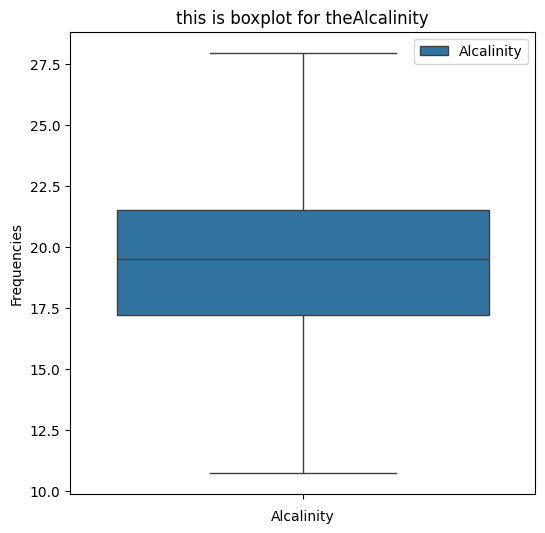

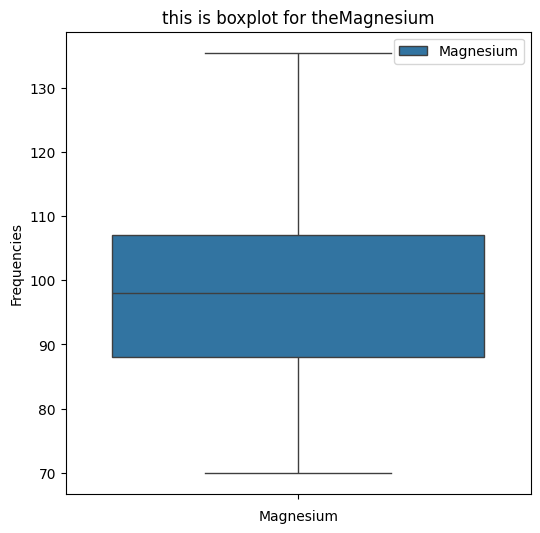

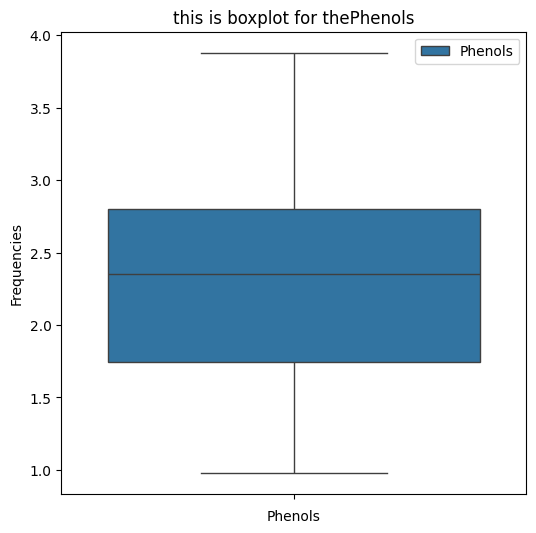

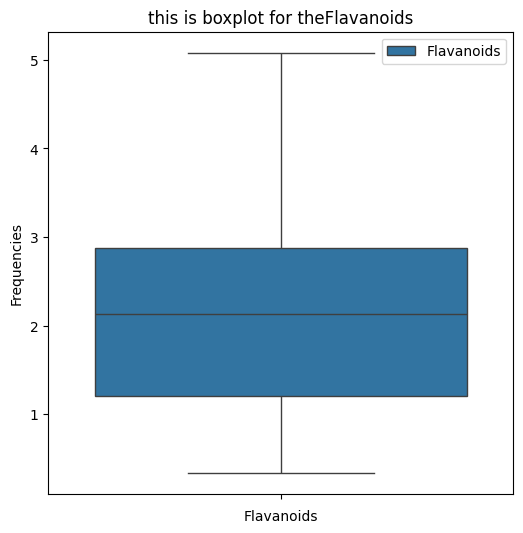

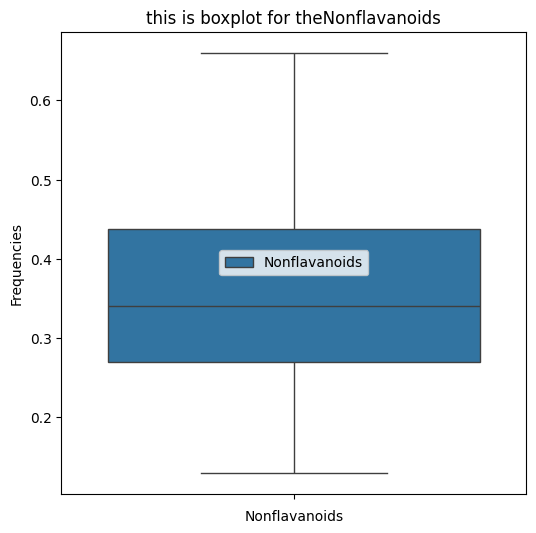

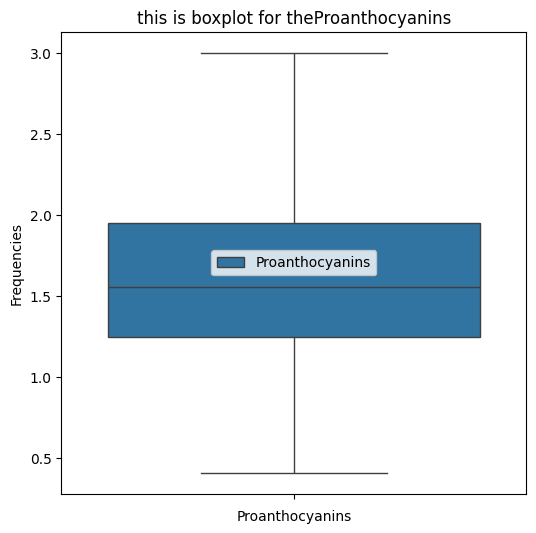

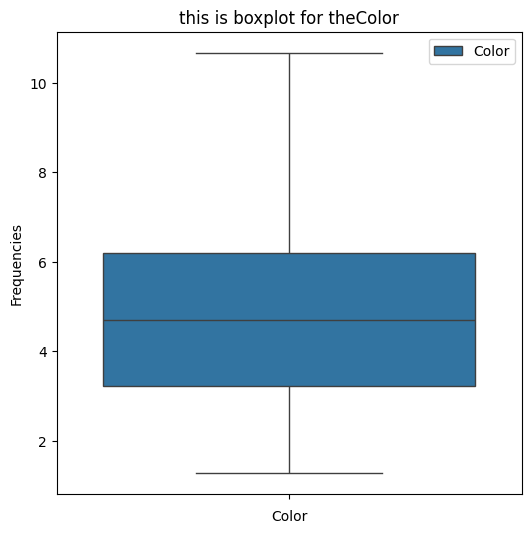

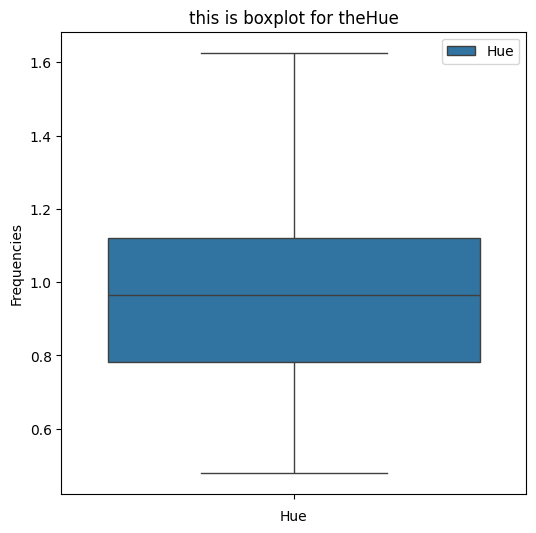

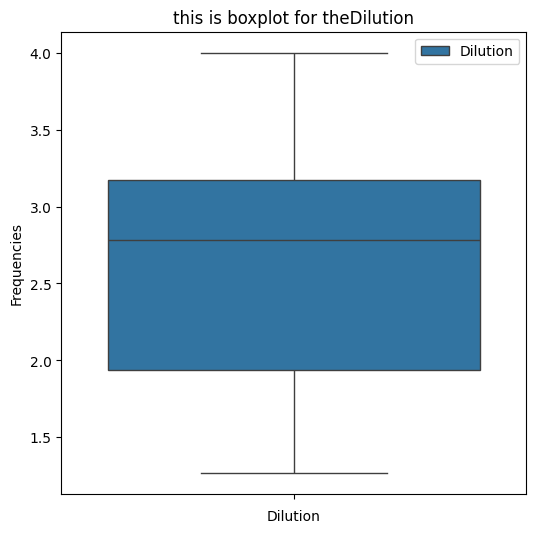

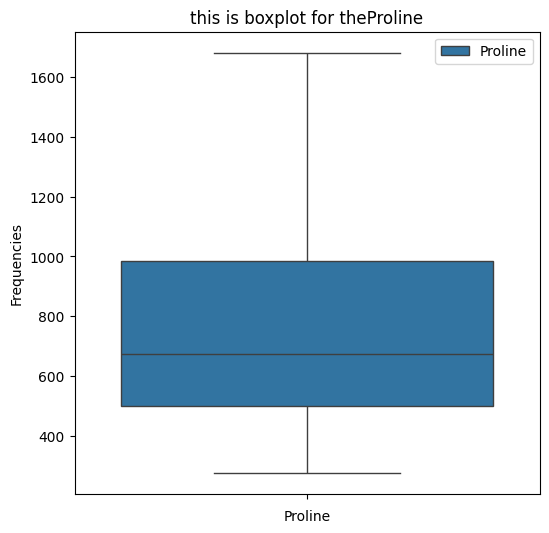

In [20]:
for col in df.columns:
    plt.figure(figsize=(6,6))
    sns.boxplot(df[col],label=col)
    plt.xlabel(col)
    plt.ylabel("Frequencies")
    plt.title(f"this is boxplot for the{col}")
    plt.legend()
    plt.show()

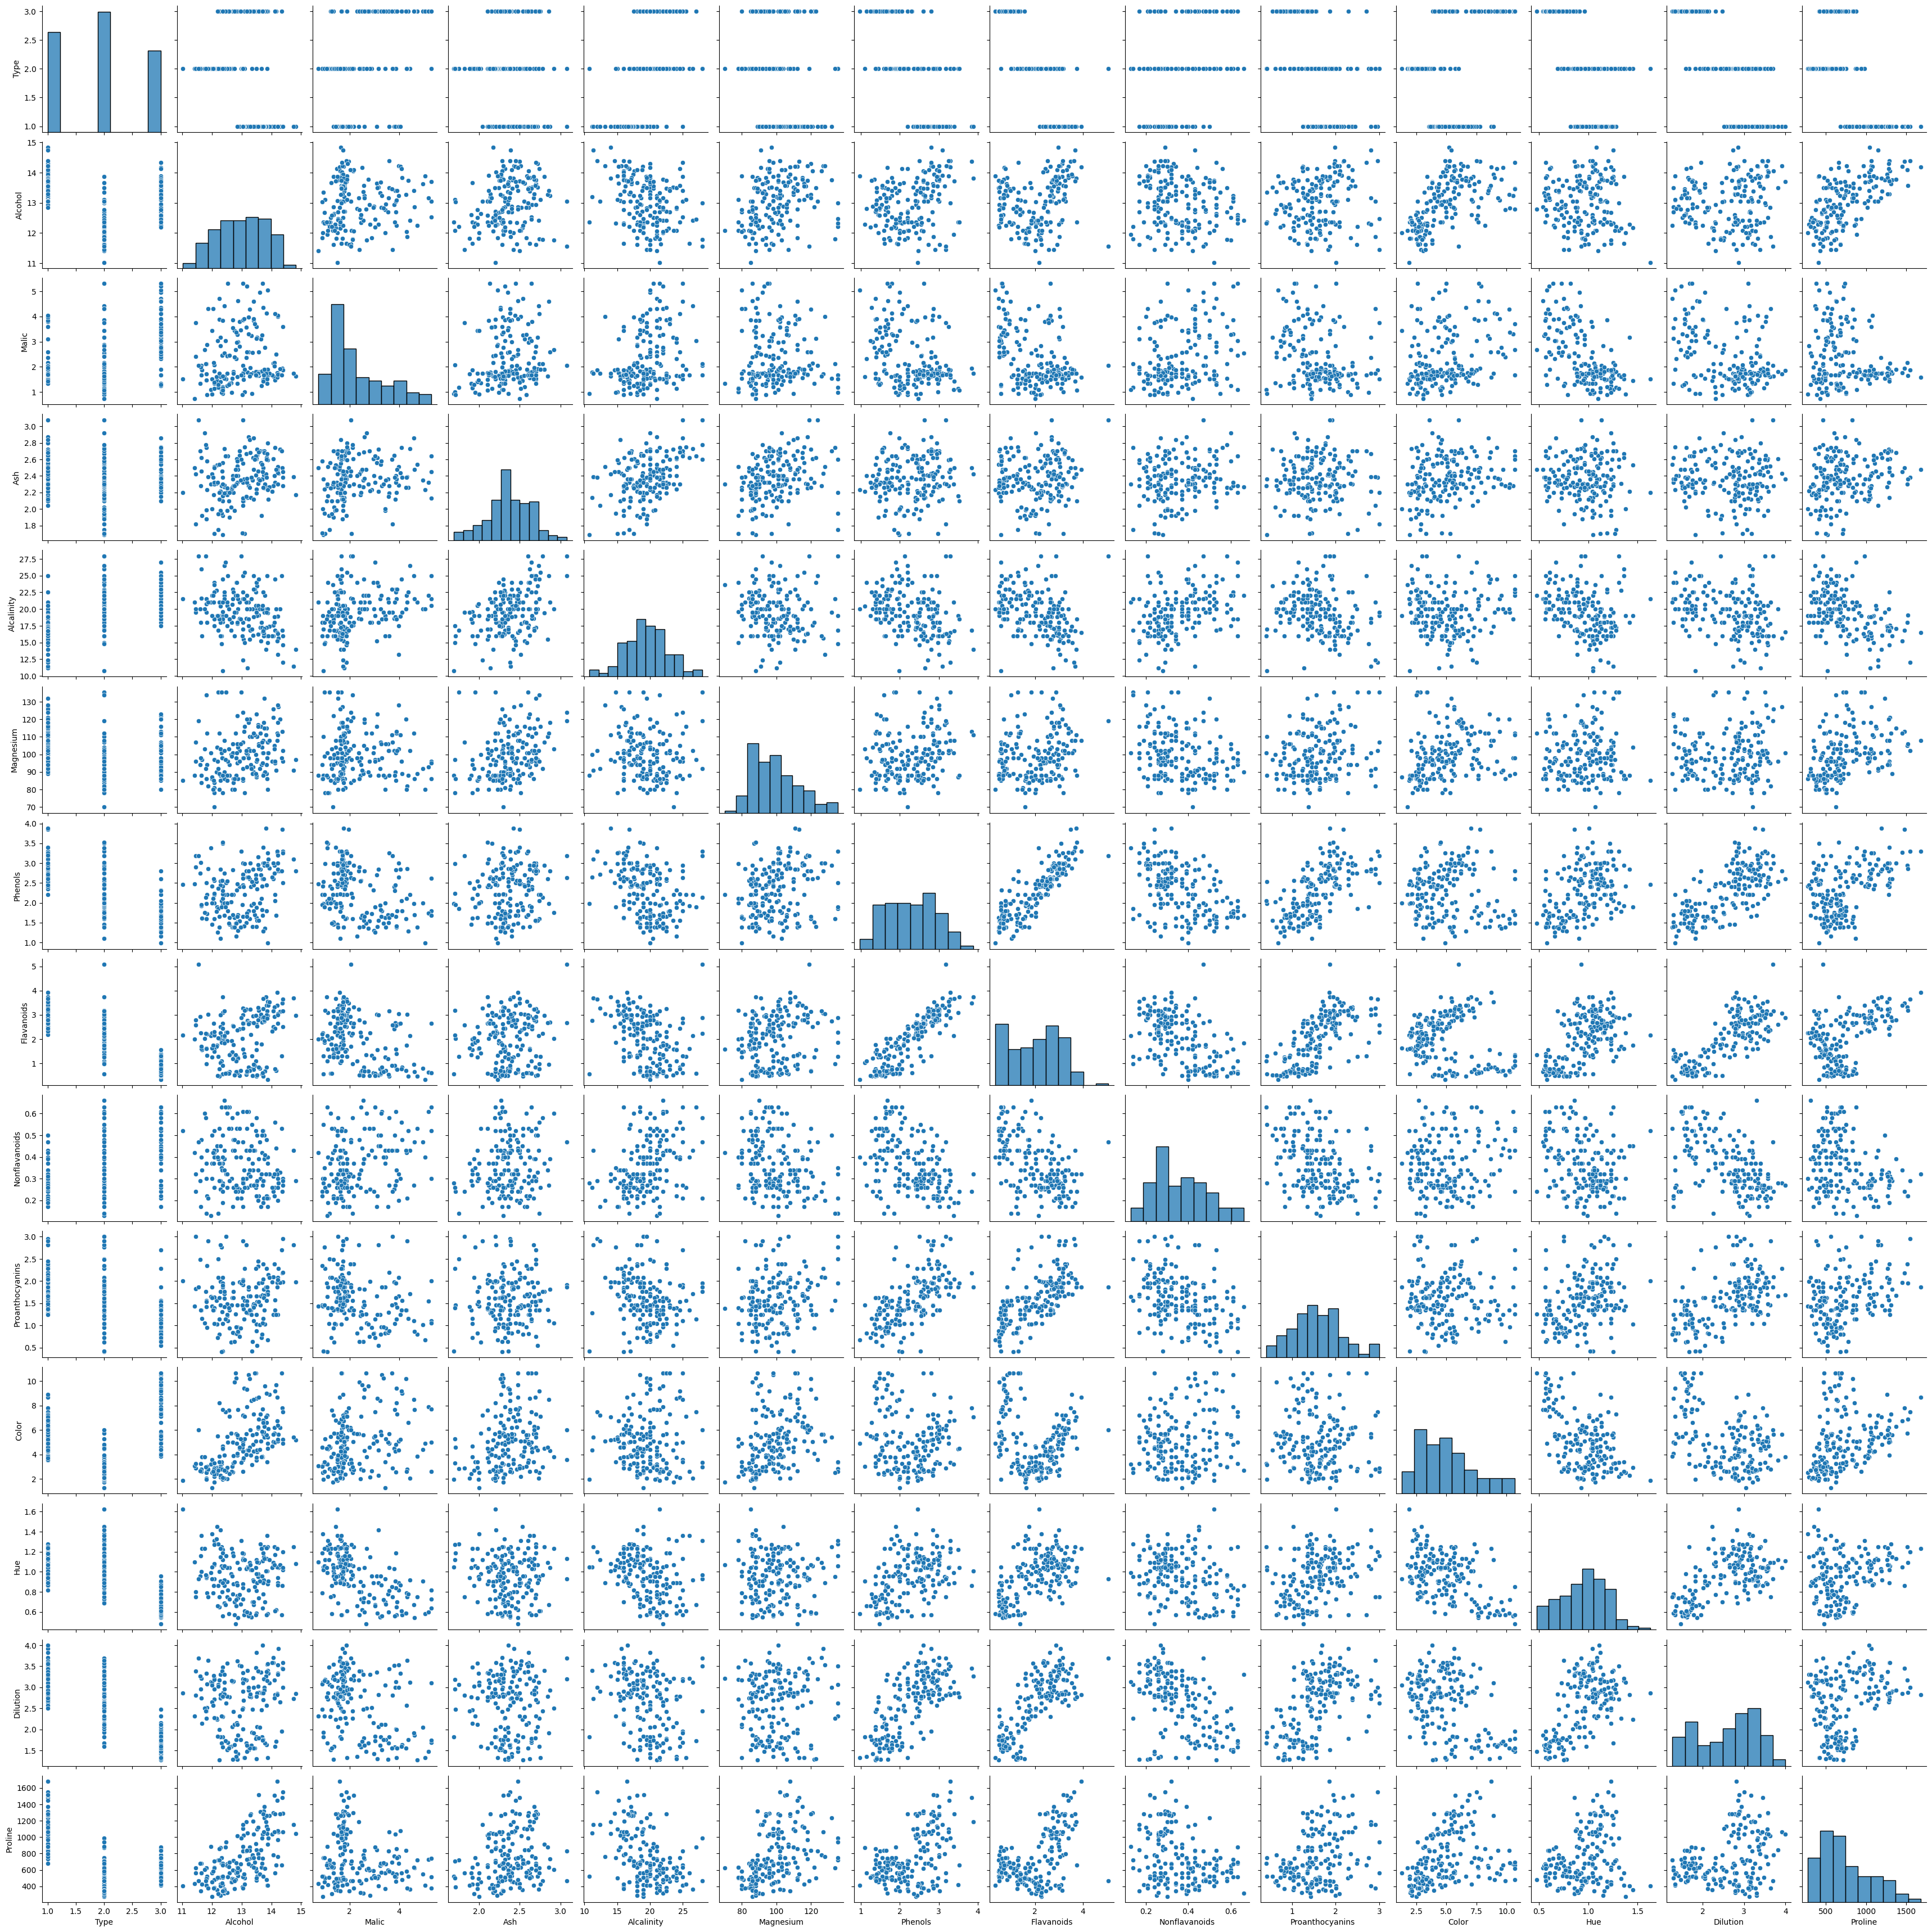

In [21]:
sns.pairplot(df)

In [22]:
cor=df.corr()

In [24]:
cor

Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.440422 -0.047680    0.525608   
Alcohol         -0.328222  1.000000  0.094756  0.220174   -0.312191   
Malic            0.440422  0.094756  1.000000  0.166614    0.295882   
Ash             -0.047680  0.220174  0.166614  1.000000    0.427713   
Alcalinity       0.525608 -0.312191  0.295882  0.427713    1.000000   
Magnesium       -0.224264  0.302173 -0.039329  0.322510   -0.098030   
Phenols         -0.719163  0.289101 -0.339050  0.124436   -0.333046   
Flavanoids      -0.847498  0.236815 -0.414875  0.097562   -0.363405   
Nonflavanoids    0.489109 -0.155929  0.294203  0.183666    0.369276   
Proanthocyanins -0.512528  0.153171 -0.234575  0.006080   -0.208794   
Color            0.260260  0.549107  0.264897  0.256799    0.009748   
Hue             -0.621549 -0.067156 -0.566409 -0.075904   -0.286664   
Dilution        -0.788230  0.072343 -0.372582 -0.011214   -0.287032   
Proline         -0.633717  0.643720 -0.191173  0.229676   -0.448700   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type             -0.224264 -0.719163   -0.847498       0.489109   
Alcohol           0.302173  0.289101    0.236815      -0.155929   
Malic            -0.039329 -0.339050   -0.414875       0.294203   
Ash               0.322510  0.124436    0.097562       0.183666   
Alcalinity       -0.098030 -0.333046   -0.363405       0.369276   
Magnesium         1.000000  0.227035    0.209431      -0.255674   
Phenols           0.227035  1.000000    0.864564      -0.449935   
Flavanoids        0.209431  0.864564    1.000000      -0.537900   
Nonflavanoids    -0.255674 -0.449935   -0.537900       1.000000   
Proanthocyanins   0.201428  0.618771    0.665384      -0.368455   
Color             0.240505 -0.062101   -0.169807       0.131596   
Hue               0.040007  0.435952    0.546718      -0.266995   
Dilution          0.064019  0.699949    0.787194      -0.503270   
Proline           0.411557  0.498115    0.494193      -0.311385   

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type                   -0.512528  0.260260 -0.621549 -0.788230 -0.633717  
Alcohol                 0.153171  0.549107 -0.067156  0.072343  0.643720  
Malic                  -0.234575  0.264897 -0.566409 -0.372582 -0.191173  
Ash                     0.006080  0.256799 -0.075904 -0.011214  0.229676  
Alcalinity             -0.208794  0.009748 -0.286664 -0.287032 -0.448700  
Magnesium               0.201428  0.240505  0.040007  0.064019  0.411557  
Phenols                 0.618771 -0.062101  0.435952  0.699949  0.498115  
Flavanoids              0.665384 -0.169807  0.546718  0.787194  0.494193  
Nonflavanoids          -0.368455  0.131596 -0.266995 -0.503270 -0.311385  
Proanthocyanins         1.000000 -0.032693  0.306289  0.530565  0.340562  
Color                  -0.032693  1.000000 -0.520416 -0.430638  0.327100  
Hue                     0.306289 -0.520416  1.000000  0.568387  0.239968  
Dilution                0.530565 -0.430638  0.568387  1.000000  0.312761  
Proline                 0.340562  0.327100  0.239968  0.312761  1.000000

<Axes: >

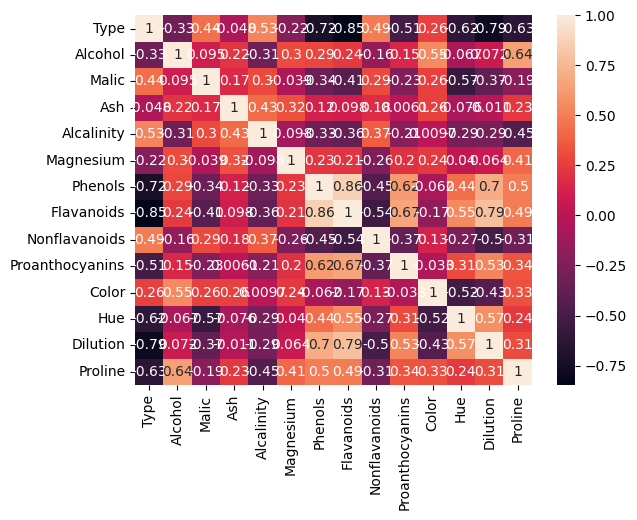

In [25]:
sns.heatmap(cor,annot=True)

In [26]:
features=df

In [29]:
features

Type  Alcohol   Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23  1.7100  2.43        15.6      127.0     2.80        3.06   
1       1    13.20  1.7800  2.14        11.2      100.0     2.65        2.76   
2       1    13.16  2.3600  2.67        18.6      101.0     2.80        3.24   
3       1    14.37  1.9500  2.50        16.8      113.0     3.85        3.49   
4       1    13.24  2.5900  2.87        21.0      118.0     2.80        2.69   
..    ...      ...     ...   ...         ...        ...      ...         ...   
173     3    13.71  5.3025  2.45        20.5       95.0     1.68        0.61   
174     3    13.40  3.9100  2.48        23.0      102.0     1.80        0.75   
175     3    13.27  4.2800  2.26        20.0      120.0     1.59        0.69   
176     3    13.17  2.5900  2.37        20.0      120.0     1.65        0.68   
177     3    14.13  4.1000  2.74        24.5       96.0     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [30]:
scaler=StandardScaler()

In [191]:
scaled_data=scaler.fit_transform(features)

In [192]:
scaled_data

array([[-1.21394365,  1.51861254, -0.56553422, ...,  1.01300893,
         0.13281518, -0.40169913],
       [-1.21394365,  0.24628963, -0.50172839, ...,  0.96524152,
         0.13281518, -0.40169913],
       [-1.21394365,  0.19687903,  0.02694849, ...,  1.39514818,
         0.13281518, -0.40169913],
       ...,
       [ 1.37386437,  0.33275817,  1.77705125, ...,  0.28057537,
         1.37708374,  1.43169689],
       [ 1.37386437,  0.20923168,  0.23659622, ...,  0.29649784,
         1.37708374,  1.43169689],
       [ 1.37386437,  1.39508604,  1.61297912, ..., -0.59516041,
         1.37708374,  1.43169689]], shape=(178, 16))

In [308]:
pca=PCA(n_components=2)

In [309]:
pca_scaled=pca.fit_transform(scaled_data)

In [310]:
pca_scaled

array([[-3.25860150e+00,  2.10781888e+00],
       [-2.43593013e+00,  3.60552288e-01],
       [-2.62098174e+00,  1.48323271e+00],
       [-3.49336077e+00,  3.30792594e+00],
       [-1.35677370e+00,  1.06108010e+00],
       [-2.96170292e+00,  2.63718145e+00],
       [-2.52400700e+00,  1.67971736e+00],
       [-2.15867876e+00,  2.01373787e+00],
       [-2.58792391e+00,  1.47714607e+00],
       [-2.79304873e+00,  1.39116324e+00],
       [-3.39369127e+00,  1.97297795e+00],
       [-1.96474838e+00,  1.06017740e+00],
       [-2.27504342e+00,  1.15542675e+00],
       [-3.67329102e+00,  1.75607509e+00],
       [-4.04996162e+00,  2.85530821e+00],
       [-2.36214248e+00,  2.09141728e+00],
       [-2.20278158e+00,  2.61582484e+00],
       [-2.03263024e+00,  1.93418201e+00],
       [-3.33911704e+00,  3.07473669e+00],
       [-2.21078676e+00,  1.53494781e+00],
       [-3.13838978e+00,  1.49219511e+00],
       [-1.44572828e+00,  5.46121353e-01],
       [-2.71414777e+00,  5.61590566e-01],
       [-1.

In [311]:
explained_variance=pca.explained_variance_ratio_

In [312]:
cumilative_explained=explained_variance.cumsum()

In [313]:
explained_variance

array([0.38779741, 0.19785631])

In [314]:
cumilative_explained

array([0.38779741, 0.58565372])

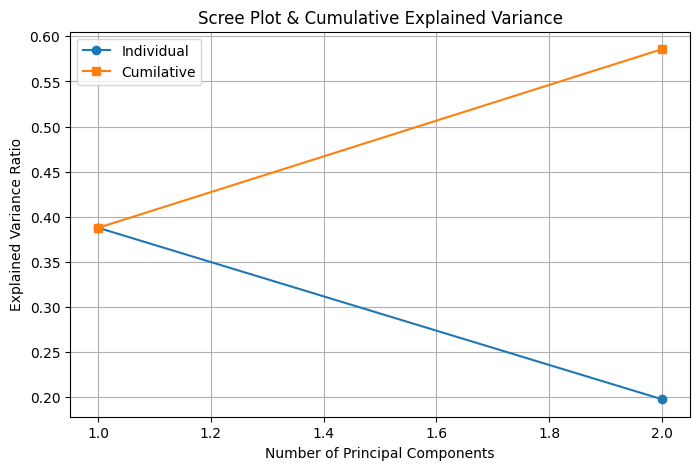

Explained Variance Ratio: [0.38779741 0.19785631]
Cumulative Variance: [0.38779741 0.58565372]


In [315]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label="Individual")
plt.plot(range(1, len(explained_variance)+1), cumilative_explained, marker='s', label="Cumilative")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot & Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.show()
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Variance:", cumilative_explained)

In [316]:
kmeans=KMeans(n_clusters=3,random_state=50)

In [317]:
clusters=kmeans.fit(scaled_data)

In [318]:
clusters

KMeans(n_clusters=3, random_state=50)

In [319]:
df["clusters"]=clusters.labels_

In [320]:
df[["clusters"]]

clusters
0           1
1           1
2           1
3           1
4           1
..        ...
173         2
174         2
175         2
176         2
177         2

[178 rows x 1 columns]

In [555]:
from pandas.plotting import parallel_coordinates

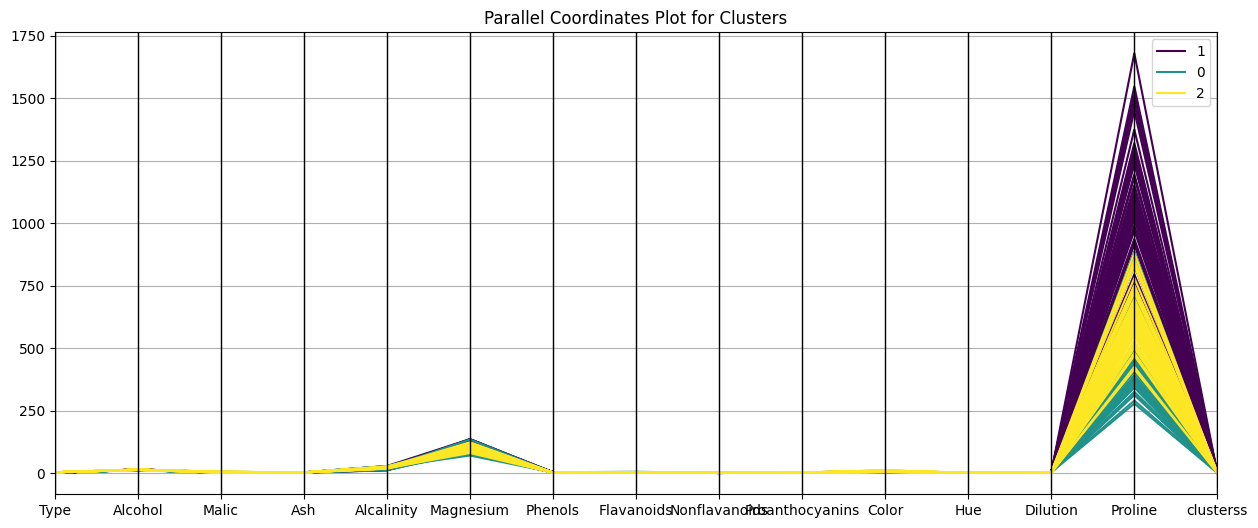

In [556]:
plt.figure(figsize=(15,6))
parallel_coordinates(df, class_column='clusters', colormap='viridis')
plt.title("Parallel Coordinates Plot for Clusters")
plt.show()

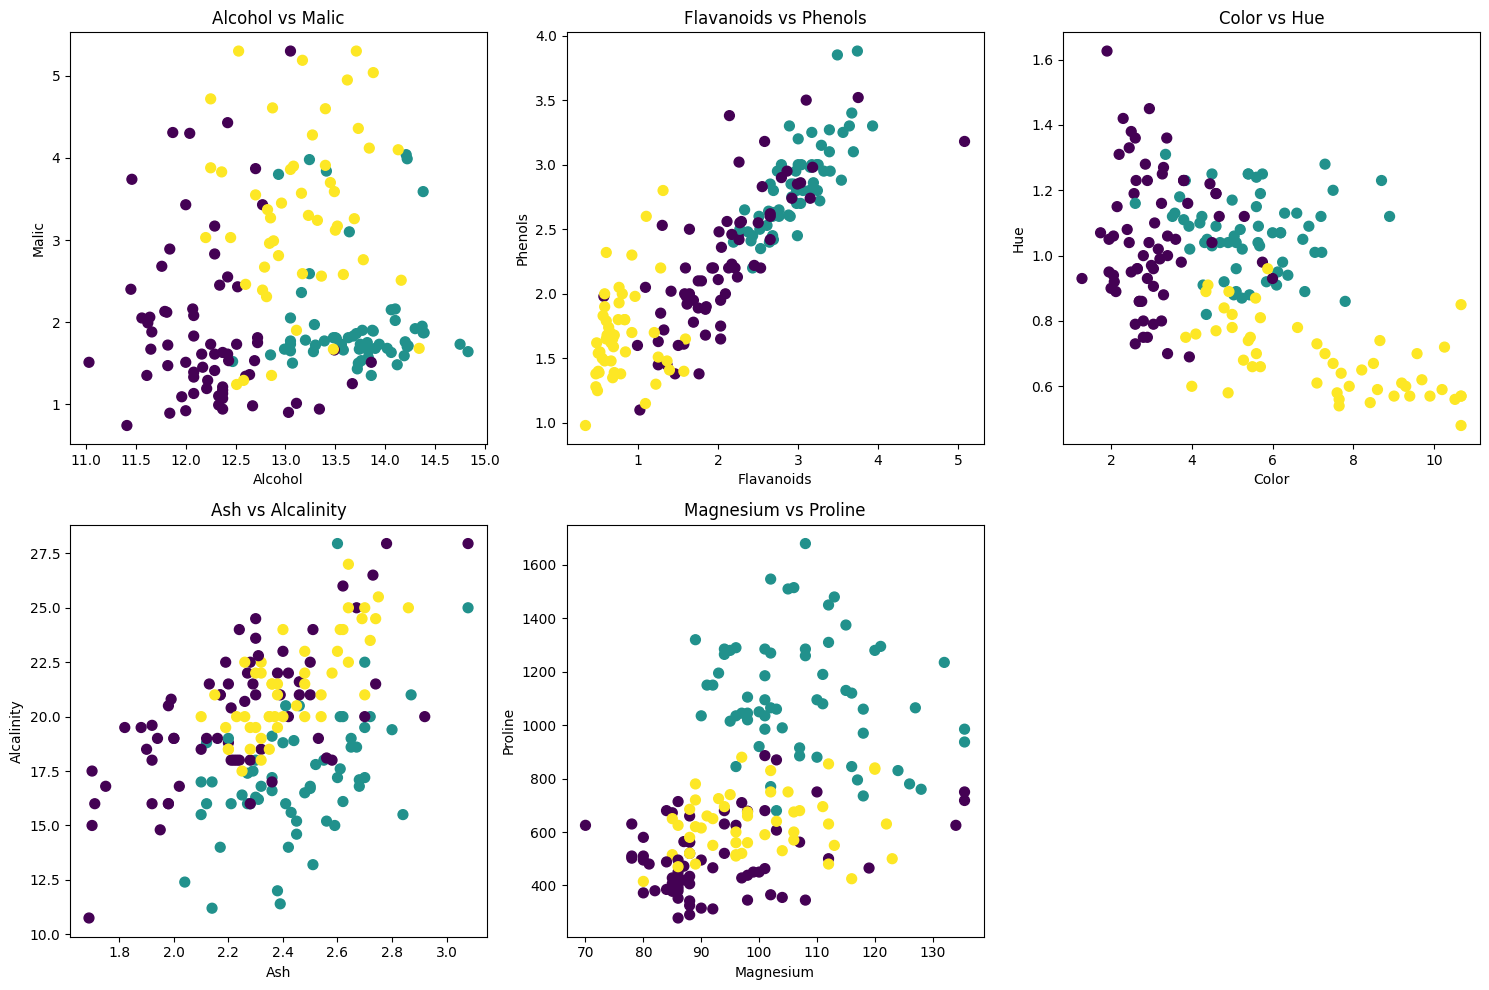

In [560]:
feature_pairs = [
    ('Alcohol', 'Malic'),
    ('Flavanoids', 'Phenols'),
    ('Color', 'Hue'),
    ('Ash', 'Alcalinity'),
    ('Magnesium', 'Proline')
]

plt.figure(figsize=(15,10))

for i, (x_feat, y_feat) in enumerate(feature_pairs, start=1):
    plt.subplot(2, 3, i)
    plt.scatter(df[x_feat], df[y_feat], c=df["clusters"], cmap='viridis', s=50)
    plt.xlabel(x_feat)
    plt.ylabel(y_feat)
    plt.title(f"{x_feat} vs {y_feat}")

plt.tight_layout()
plt.show()


silloutte scores before applying pca

In [321]:
silhouette_score(scaled_data,clusters.labels_)

0.33869206833538446

In [322]:
dbscan=DBSCAN(eps=2.4,min_samples=6,metric="euclidean")

In [323]:
clusterss=dbscan.fit_predict(scaled_data)

In [324]:
clusterss

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  1,  1, -1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  2,  2,  2,  2, -1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

In [325]:
df["clusterss"]=clusterss

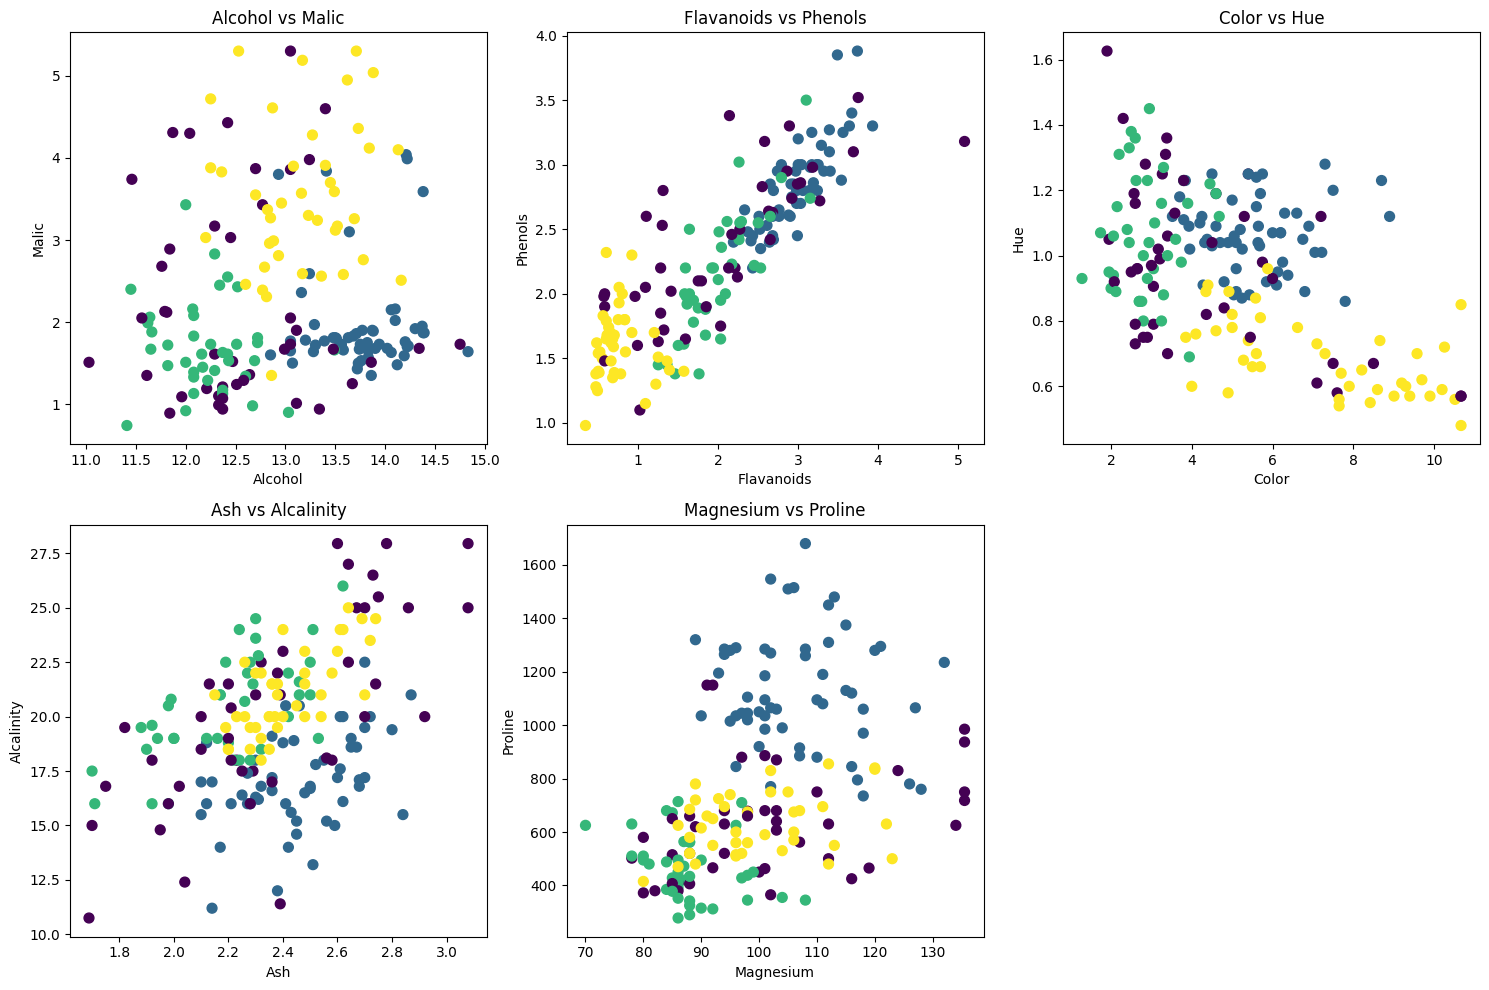

In [561]:
feature_pairs = [
    ('Alcohol', 'Malic'),
    ('Flavanoids', 'Phenols'),
    ('Color', 'Hue'),
    ('Ash', 'Alcalinity'),
    ('Magnesium', 'Proline')
]

plt.figure(figsize=(15,10))

for i, (x_feat, y_feat) in enumerate(feature_pairs, start=1):
    plt.subplot(2, 3, i)
    plt.scatter(df[x_feat], df[y_feat], c=df["clusterss"], cmap='viridis', s=50)
    plt.xlabel(x_feat)
    plt.ylabel(y_feat)
    plt.title(f"{x_feat} vs {y_feat}")

plt.tight_layout()
plt.show()


In [326]:
silhouette_score(scaled_data,clusterss)

0.289273357358915

In [362]:
pca_kmeans=KMeans(n_clusters=3,random_state=42)

In [363]:
kmeans_pca_clusts=pca_kmeans.fit_predict(pca_scaled)

In [423]:
kmeans_pca_clusts

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [563]:
df["kmeans_pca_clusts"]=kmeans_pca_clusts

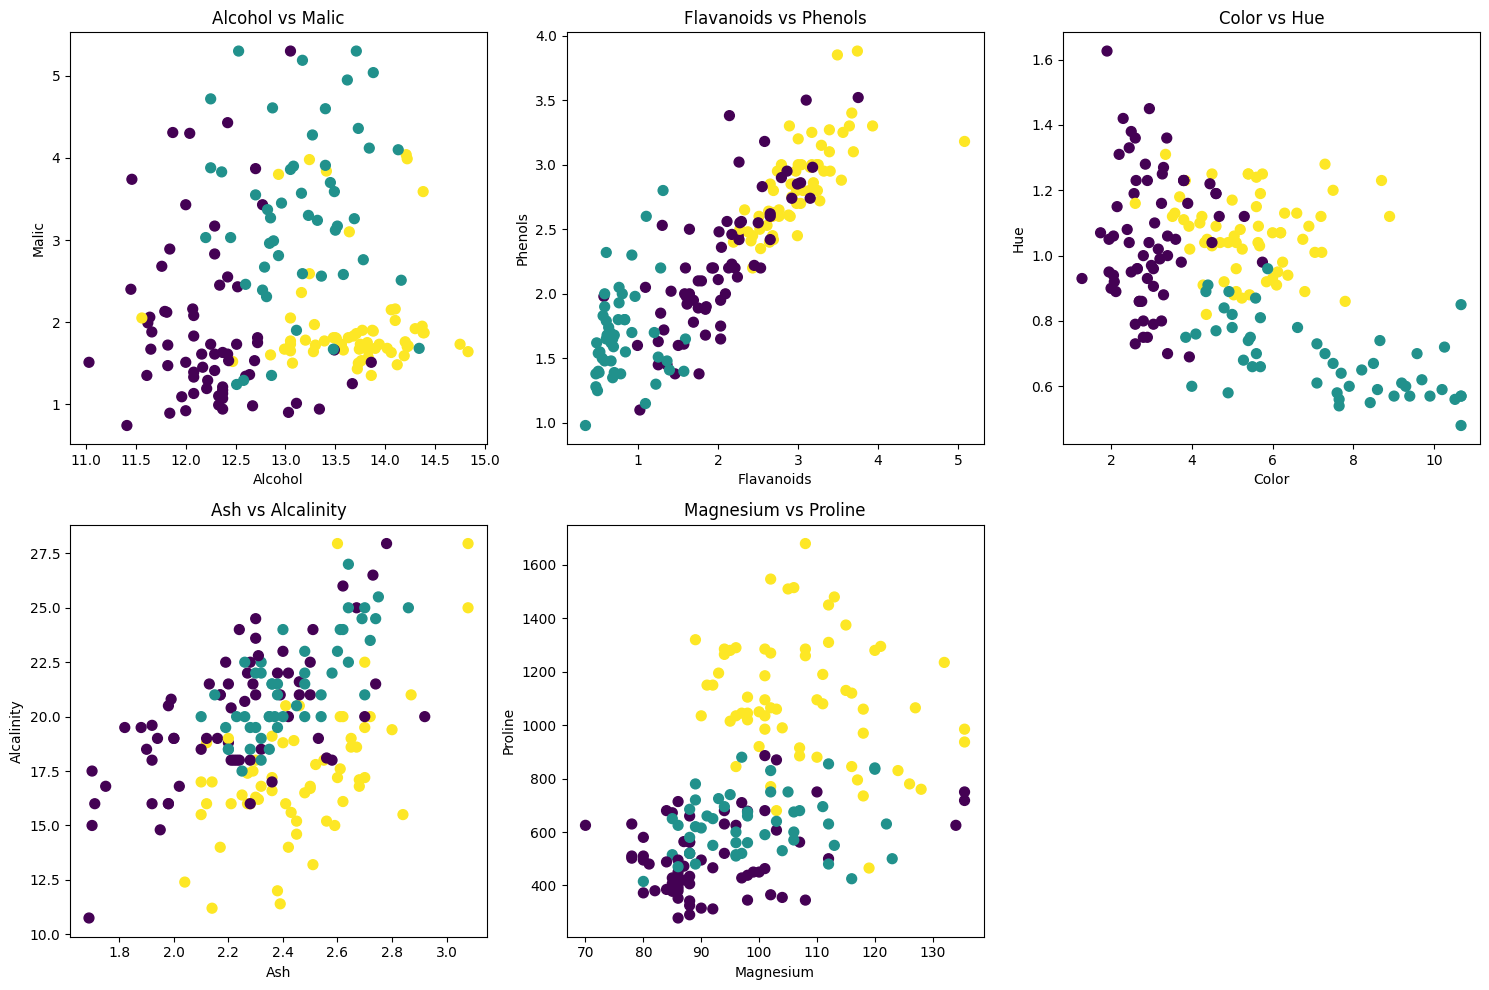

In [564]:
feature_pairs = [
    ('Alcohol', 'Malic'),
    ('Flavanoids', 'Phenols'),
    ('Color', 'Hue'),
    ('Ash', 'Alcalinity'),
    ('Magnesium', 'Proline')
]

plt.figure(figsize=(15,10))

for i, (x_feat, y_feat) in enumerate(feature_pairs, start=1):
    plt.subplot(2, 3, i)
    plt.scatter(df[x_feat], df[y_feat], c=df["kmeans_pca_clusts"], cmap='viridis', s=50)
    plt.xlabel(x_feat)
    plt.ylabel(y_feat)
    plt.title(f"{x_feat} vs {y_feat}")

plt.tight_layout()
plt.show()


silloutte scores after applying pca

In [524]:
silhouette_score(pca_scaled,kmeans_pca_clusts)

0.6622856024837758

In [544]:
dbscan=DBSCAN(eps=0.8,min_samples=10,metric="euclidean")

In [545]:
dbscan_scaled_pca=dbscan.fit_predict(pca_scaled)

In [547]:
silhouette_score(pca_scaled,dbscan_scaled_pca)

0.5968224340344112

In [562]:
df["dbscan_scaled_pca"]=dbscan_scaled_pca

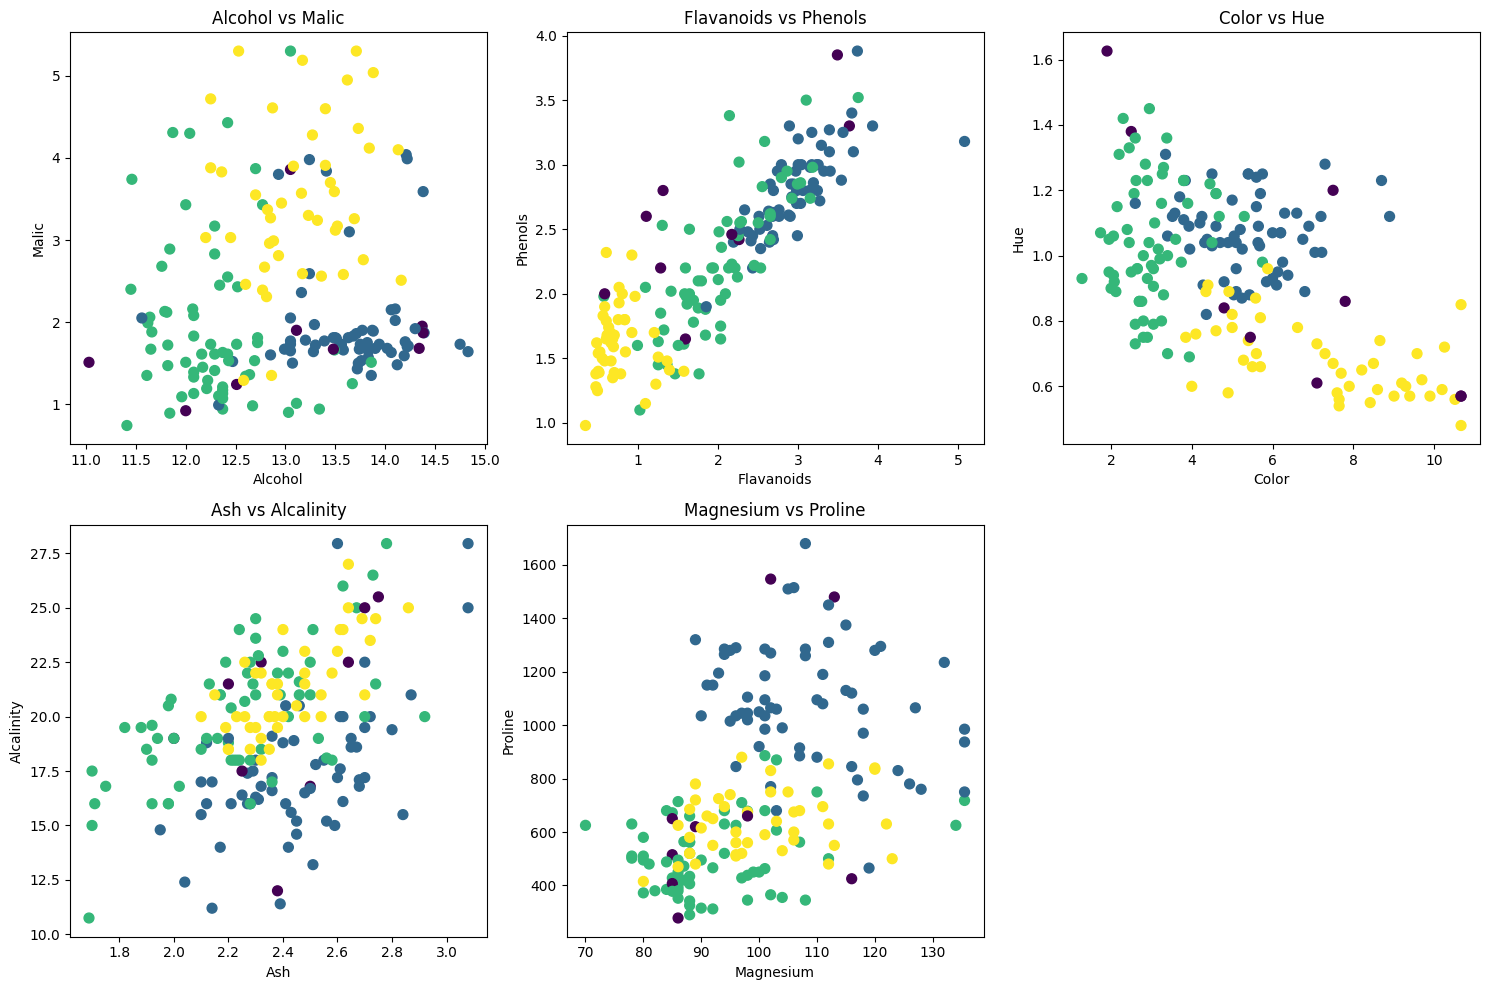

In [565]:
feature_pairs = [
    ('Alcohol', 'Malic'),
    ('Flavanoids', 'Phenols'),
    ('Color', 'Hue'),
    ('Ash', 'Alcalinity'),
    ('Magnesium', 'Proline')
]

plt.figure(figsize=(15,10))

for i, (x_feat, y_feat) in enumerate(feature_pairs, start=1):
    plt.subplot(2, 3, i)
    plt.scatter(df[x_feat], df[y_feat], c=df["dbscan_scaled_pca"], cmap='viridis', s=50)
    plt.xlabel(x_feat)
    plt.ylabel(y_feat)
    plt.title(f"{x_feat} vs {y_feat}")

plt.tight_layout()
plt.show()


Comparisionsss of results from original data clusters and pca transformed clusters

original data:
1 clusters are overlaped in some features
2 silhouette score is lower due to noise and redundant features

pca transformed data:
1 clusters are well seperated in feturesss
2 silhouette score is higher since it removes noise,correlations and redundant features

Similarities:
Both approaches can identify the same general cluster
Major patterns are preserved; samples in one cluster generally remain together.

Differences:
PCA may slightly change cluster assignments for some edge points because it compresses data and emphasizes directions of maximum variance.
Silhouette score may improve with PCA because it removes noise and redundant features.
Visualization is far easier after PCA, giving a clearer sense of separation.

Impact of Dimensionality Reduction on Clustering

Positive impacts:
Reduces computational cost, especially for large datasets.
Removes correlated or noisy features, which often improves clustering quality.
Facilitates visualization.

Negative impacts:
Some information is inevitably lost, especially in lower-variance components.
Cluster shapes may slightly distort in reduced space, affecting exact assignments.
Choice of number of principal components affects results — too few may merge clusters, too many may retain noise.

Trade-offs:
Clustering on Original Data:
Can be lower if data has redundant/noisy features
Works with all raw information

PCA + Clustering:
May improve due to noise reduction
Allows focus on most important variance directions

PCA is generally beneficial when the dataset is high-dimensional and noisy.
Direct clustering is preferable if interpretability of original features is crucial.
For the Wine dataset, PCA + KMeans provides a good balance: reduced dimensionality, better visualization, and often slightly improved clustering metrics.